Previously, I extracted data t.hat overlapped both temporally and (approximately) spatially the stranding data. This notebook documents a more in-depth exploration

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb
import os
from matplotlib import rcParams

In [2]:
sb.reset_defaults()
rcParams['font.size'] = 16
rcParams['axes.formatter.limits'] = (-2,4)
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['figure.figsize'] = (10,5)
sb.set_style('darkgrid')

In [3]:
%matplotlib inline

In [4]:
dataMain = '/home/madhatter106/DATA/Beaching_Project/CapeCodData/PklJar/'

In [24]:
dataReSave = '../PklJar/'

In [25]:
fn = 'dfCensusCapeCodLagenorhyncus.pkl'

In [5]:
fp = os.path.join(dataMain, fn)

In [7]:
dfcens = pd.read_pickle(fp)

In [8]:
dfcens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 6 columns):
index        1056 non-null int64
row_id       1056 non-null object
latitude     1056 non-null float64
longitude    1056 non-null float64
date_time    1056 non-null datetime64[ns]
count        1056 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 49.6+ KB


In [9]:
dfcens.head()

,index,row_id,latitude,longitude,date_time,count
0,13,513_1555,42.5245,-69.910000,1999-03-21 10:35:40,9.0
1,434,513_1643,42.3685,-70.120667,1999-03-26 11:02:25,4.0
2,435,513_1644,42.3680,-70.091500,1999-03-26 11:03:09,6.0
3,679,513_1652,42.4525,-70.535667,1999-03-26 11:48:23,4.0
4,2447,513_82100,42.5330,-69.798667,1999-03-26 12:20:42,2.0


In [10]:
dfcens.sort_values(by='date_time', inplace=True)
dfcens.set_index('date_time', inplace=True)

In [ ]:
dfcens.meta={'scientific':'Lagenorhynchus acutus',
             'common': 'Atlantic White-sided Dolphin'}

In [ ]:
dfcens.drop(['scientific', 'common'], axis=1, inplace=True)

In [26]:
dfcens.to_pickle(os.path.join(dataReSave, fn))

In [23]:
dfcens.head()

,row_id,latitude,longitude,count
date_time,,,,
1999-03-21 10:35:40,513_1555,42.5245,-69.910000,9.0
1999-03-26 11:02:25,513_1643,42.3685,-70.120667,4.0
1999-03-26 11:03:09,513_1644,42.3680,-70.091500,6.0
1999-03-26 11:48:23,513_1652,42.4525,-70.535667,4.0
1999-03-26 12:20:42,513_82100,42.5330,-69.798667,2.0


In [13]:
dfcens.drop('index', axis=1, inplace=True)

In [29]:
fpm = os.path.join(dataReSave,fn.split('.')[0] + '_month.pkl')

In [15]:
dfmo = dfcens.resample('M').sum()

In [31]:
dfmo.to_pickle(fpm)

In [30]:
dfmo.head()

,latitude,longitude,count
date_time,,,
1999-03-31,554.017168,-908.495835,157.0
1999-04-30,418.719665,-698.096906,190.0
1999-05-31,705.392667,-1179.254834,227.0
1999-06-30,41.971000,-69.269500,45.0
1999-07-31,NaN,NaN,NaN


In [18]:
dfmo.index.month.value_counts().sort_index()

1     15
2     15
3     16
4     16
5     16
6     16
7     16
8     16
9     16
10    16
11    16
12    16
Name: date_time, dtype: int64

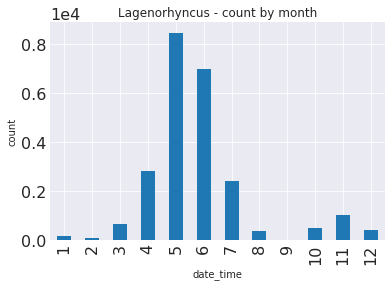

In [19]:
gp = dfmo.groupby(by=dfmo.index.month)
ax = gp['count'].sum().plot(kind='bar');
ax.set_title('Lagenorhyncus - count by month')
ax.set_ylabel('count');

In [20]:
dfy = dfmo.resample('A').sum()

In [21]:
dfy.index.year

Int64Index([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='date_time')

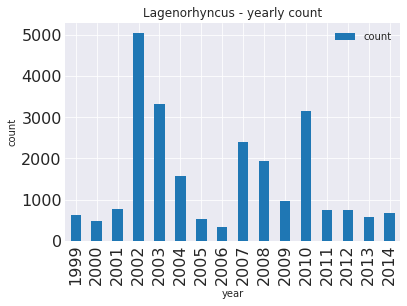

In [22]:
ax = dfy.plot(x=dfy.index.year,y='count', kind='bar');
ax.set_xlabel('year'), ax.set_ylabel('count');
ax.set_title('Lagenorhyncus - yearly count');